In [1]:
# importing libraries, etc...

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

path = "https://raw.githubusercontent.com/LennardVaarten/ML-Workshops/main/data/"

Data on 359 K8 schools in California, USA. Here, we try to use the other features to predict the average reading score of students in a given school.
* students: Total enrollment.
* teachers: Number of teachers.
* calworks: Percent qualifying for CalWorks (income assistance).
* lunch: Percent qualifying for reduced-price lunch.
* computer: Number of computers.
* expenditure: Expenditure per student.
* income: District average income (in USD 1,000).
* english: Percent of English learners.
* reading_scores: Average score on reading test.

In [2]:
# loading

schools = pd.read_csv(path+"schools.csv")

In [3]:
# viewing

schools

,reading_scores,students,teachers,calworks,lunch,computer,expenditure,income,english
0,691.599976,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000
1,660.500000,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333
2,636.299988,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002
3,651.900024,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000
4,641.799988,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677
...,...,...,...,...,...,...,...,...,...
354,700.900024,984,59.730000,0.101600,3.556900,195,7290.338867,28.716999,5.995935
355,704.000000,3724,208.479996,1.074100,1.503800,721,5741.462891,41.734108,4.726101
356,648.299988,441,20.150000,3.563500,37.193802,45,4402.831543,23.733000,24.263039
357,667.900024,101,5.000000,11.881200,59.405899,14,4776.336426,9.952000,2.970297


In [4]:
# add a new feature: students per teacher

schools["students_per_teacher"] = schools["students"] / schools["teachers"]
schools["computers_per_student"] = schools["computer"] / schools["students"]

In [5]:
schools

,reading_scores,students,teachers,calworks,lunch,computer,expenditure,income,english,students_per_teacher,computers_per_student
0,691.599976,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,17.889909,0.343590
1,660.500000,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,21.524664,0.420833
2,636.299988,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,18.697225,0.109032
3,651.900024,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,17.357143,0.349794
4,641.799988,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,18.671329,0.128090
...,...,...,...,...,...,...,...,...,...,...,...
354,700.900024,984,59.730000,0.101600,3.556900,195,7290.338867,28.716999,5.995935,16.474134,0.198171
355,704.000000,3724,208.479996,1.074100,1.503800,721,5741.462891,41.734108,4.726101,17.862625,0.193609
356,648.299988,441,20.150000,3.563500,37.193802,45,4402.831543,23.733000,24.263039,21.885856,0.102041
357,667.900024,101,5.000000,11.881200,59.405899,14,4776.336426,9.952000,2.970297,20.200000,0.138614


In [6]:
# drop features that are made redundant by our newly made features

schools.drop(columns=["teachers"], inplace=True)
schools.drop(columns=["computer"], inplace=True)

In [7]:
schools

,reading_scores,students,calworks,lunch,expenditure,income,english,students_per_teacher,computers_per_student
0,691.599976,195,0.510200,2.040800,6384.911133,22.690001,0.000000,17.889909,0.343590
1,660.500000,240,15.416700,47.916698,5099.380859,9.824000,4.583333,21.524664,0.420833
2,636.299988,1550,55.032299,76.322601,5501.954590,8.978000,30.000002,18.697225,0.109032
3,651.900024,243,36.475399,77.049202,7101.831055,8.978000,0.000000,17.357143,0.349794
4,641.799988,1335,33.108601,78.427002,5235.987793,9.080333,13.857677,18.671329,0.128090
...,...,...,...,...,...,...,...,...,...
354,700.900024,984,0.101600,3.556900,7290.338867,28.716999,5.995935,16.474134,0.198171
355,704.000000,3724,1.074100,1.503800,5741.462891,41.734108,4.726101,17.862625,0.193609
356,648.299988,441,3.563500,37.193802,4402.831543,23.733000,24.263039,21.885856,0.102041
357,667.900024,101,11.881200,59.405899,4776.336426,9.952000,2.970297,20.200000,0.138614


# **Scaling the Features**

In [8]:
# scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(schools.iloc[:,1:])

schools.iloc[:,1:] = scaler.transform(schools.iloc[:,1:])

schools

,reading_scores,students,calworks,lunch,expenditure,income,english,students_per_teacher,computers_per_student
0,691.599976,0.004207,0.007114,0.020408,0.649553,0.347149,0.000000,0.329653,0.816451
1,660.500000,0.005868,0.214977,0.479167,0.309954,0.089793,0.053581,0.637683,1.000000
2,636.299988,0.054217,0.767395,0.763226,0.416302,0.072870,0.350714,0.398070,0.259087
3,651.900024,0.005979,0.508630,0.770492,0.838942,0.072870,0.000000,0.284504,0.831194
4,641.799988,0.046282,0.461681,0.784270,0.346041,0.074917,0.162003,0.395875,0.304372
...,...,...,...,...,...,...,...,...,...
354,700.900024,0.033327,0.001417,0.035569,0.888740,0.467705,0.070095,0.209672,0.470901
355,704.000000,0.134453,0.014978,0.015038,0.479573,0.728084,0.055250,0.327341,0.460061
356,648.299988,0.013287,0.049691,0.371938,0.125946,0.368012,0.283646,0.668293,0.242473
357,667.900024,0.000738,0.165677,0.594059,0.224615,0.092353,0.034724,0.525424,0.329379


In [9]:
# splitting into training set and test set

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(schools.iloc[:,1:], 
                                                                            schools.iloc[:,0], 
                                                                            random_state=99)

# **Plotting**

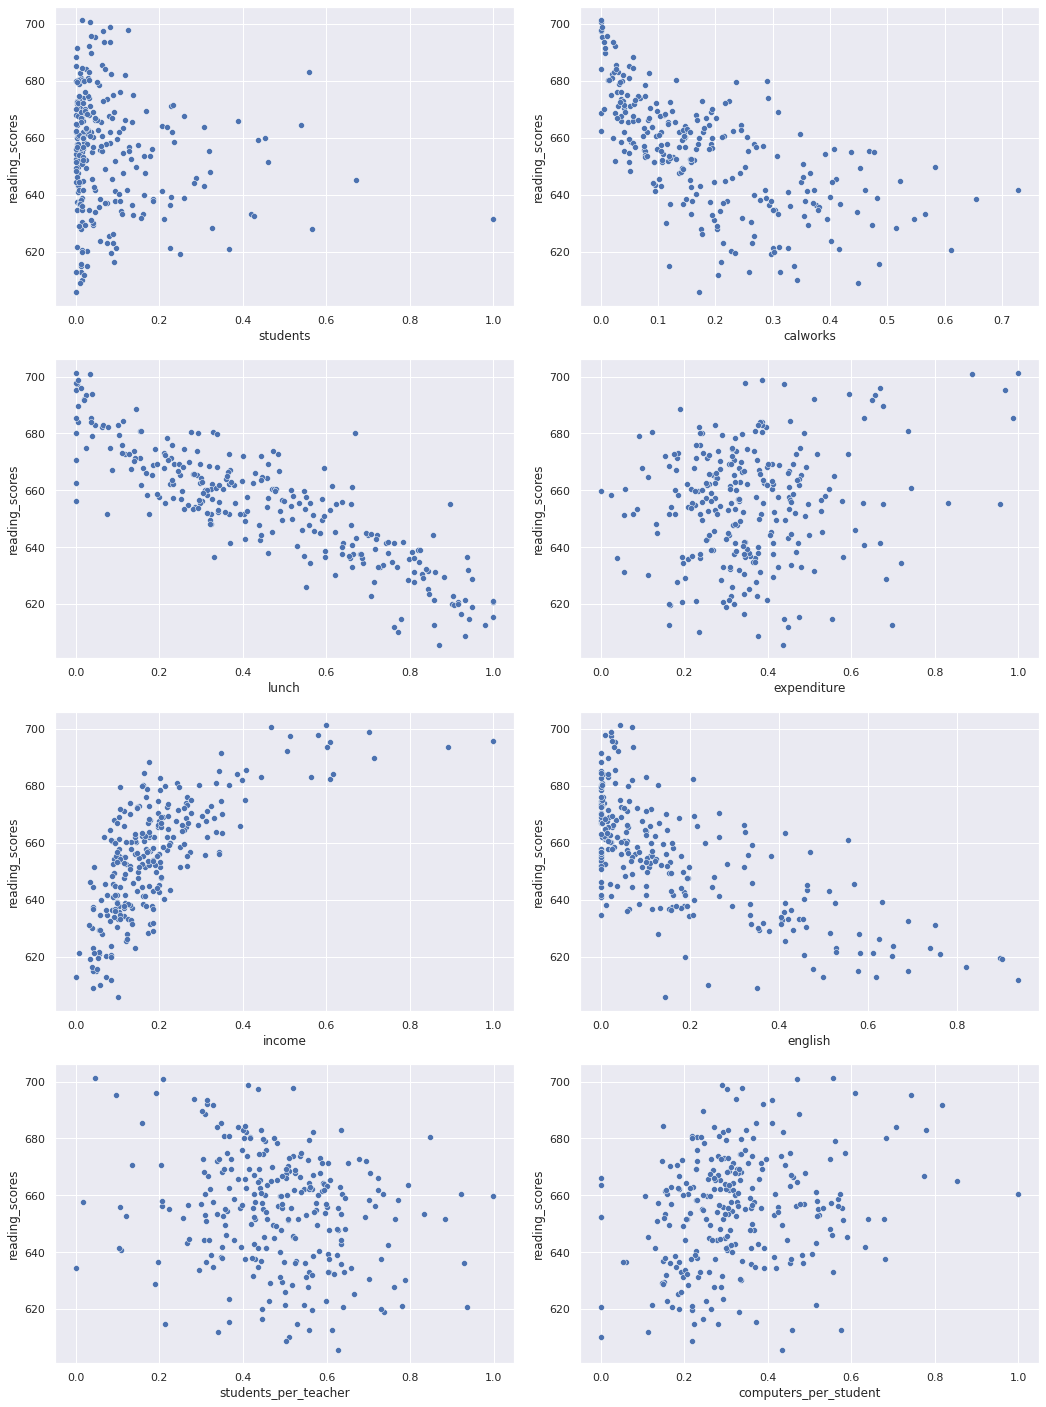

In [10]:
# plotting every feature against reading_scores

train = pd.concat([target_train, features_train],axis=1)

fig, axes = plt.subplots(4, 2, figsize=(15,20))
fig.tight_layout(pad=3)

for i in range(len(train.columns)-1):
  sns.scatterplot(ax=axes[i//2, i%2], x=train[train.columns[i+1]], y=train["reading_scores"])

# ***k*-NN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 7).fit(features_train, target_train)

print("Training set score: {:.3f}".format(knr.score(features_train, target_train)))
print("Test set score: {:.3f}".format(knr.score(features_test, target_test)))

# **Linear Regression**

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(features_train, target_train)

print("Training set score: {:.3f}".format(lr.score(features_train, target_train)))
print("Test set score: {:.3f}".format(lr.score(features_test, target_test)))

Training set score: 0.822
Test set score: 0.824


In [12]:
# Having a look at the coefficients

for col, coef in zip(features_train.columns, lr.coef_):
    print("{:25}{:.2f}".format(col, coef))

print()

print("{:25}{:.2f}".format("intercept", lr.intercept_))

students                 -1.28
calworks                 -1.54
lunch                    -38.52
expenditure              5.32
income                   32.78
english                  -25.18
students_per_teacher     -1.02
computers_per_student    3.96

intercept                667.82


# **Regularization: Ridge (L2) and Lasso (L1)**

In [15]:
# training Ridge regression

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10).fit(features_train, target_train)
print("Training set score: {:.3f}".format(ridge.score(features_train, target_train)))
print("Test set score: {:.3f}".format(ridge.score(features_test, target_test)))

Training set score: 0.769
Test set score: 0.771


In [20]:
# training Lasso regression

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(features_train, target_train)
print("Training set score: {:.3f}".format(lasso.score(features_train, target_train)))
print("Test set score: {:.3f}".format(lasso.score(features_test, target_test)))

Training set score: 0.723
Test set score: 0.705


In [21]:
# comparing the coefficients

print(f"{'COLUMN':<25}{'LR':<8}{'RIDGE':<8}{'LASSO':<8}")
for i, col in enumerate(train.columns[1:]):
  print(f"{col:<25}{round(lr.coef_[i], 2):<8}{round(ridge.coef_[i], 2):<8}{round(lasso.coef_[i], 2):<8} ")

COLUMN                   LR      RIDGE   LASSO   
students                 -1.28   -0.98   -0.0     
calworks                 -1.54   -9.7    -0.0     
lunch                    -38.52  -29.73  -49.09   
expenditure              5.32    4.39    0.0      
income                   32.78   14.6    0.0      
english                  -25.18  -18.29  -1.59    
students_per_teacher     -1.02   -3.66   -0.0     
computers_per_student    3.96    4.12    0.0      


In [22]:
# randomly sampling 100 observations from the dataset

schools_sample = schools.sample(n=100, random_state=99)

schools_sample

,reading_scores,students,calworks,lunch,expenditure,income,english,students_per_teacher,computers_per_student
343,691.599976,0.099170,0.006249,0.027921,0.433344,0.576571,0.018583,0.472515,0.463572
355,704.000000,0.134453,0.014978,0.015038,0.479573,0.728084,0.055250,0.327341,0.460061
150,648.799988,0.026426,0.097978,0.357591,0.197660,0.219191,0.038137,0.590990,0.178889
217,664.200012,0.015870,0.383269,0.518519,0.488425,0.162063,0.045755,0.405658,0.139505
7,605.500000,0.029784,0.262244,1.000000,0.168984,0.056788,0.548978,0.584247,0.176612
...,...,...,...,...,...,...,...,...,...
280,662.099976,0.027643,0.145188,0.326087,0.258876,0.176925,0.005634,0.321039,0.271979
276,671.200012,0.033622,0.052010,0.228831,0.182235,0.115636,0.060102,0.603378,0.383264
12,610.000000,0.014984,0.343165,0.771484,0.235783,0.058888,0.240051,0.509171,0.000000
325,672.799988,0.013582,0.177475,0.484848,0.517341,0.152001,0.000000,0.305749,0.264614


In [23]:
# splitting into training set and test set

features_train_sample, features_test_sample, target_train_sample, target_test_sample = train_test_split(schools_sample.iloc[:,:-1], 
                                                                                                        schools_sample.iloc[:,-1],
                                                                                                        test_size=0.35, 
                                                                                                        random_state=99)

In [24]:
# training linear regression on subsampled dataset

lr = LinearRegression().fit(features_train_sample, target_train_sample)

print("Training set score: {:.3f}".format(lr.score(features_train_sample, target_train_sample)))
print("Test set score: {:.3f}".format(lr.score(features_test_sample, target_test_sample)))

Training set score: 0.215
Test set score: 0.137


In [25]:
# ridge regression on subsampled dataset

ridge = Ridge(alpha=1).fit(features_train_sample, target_train_sample)
print("Training set score: {:.3f}".format(ridge.score(features_train_sample, target_train_sample)))
print("Test set score: {:.3f}".format(ridge.score(features_test_sample, target_test_sample)))

Training set score: 0.173
Test set score: 0.219


In [26]:
# lasso regression on subsampled dataset

lasso = Lasso(alpha=0.001).fit(features_train_sample, target_train_sample)
print("Training set score: {:.3f}".format(lasso.score(features_train_sample, target_train_sample)))
print("Test set score: {:.3f}".format(lasso.score(features_test_sample, target_test_sample)))

Training set score: 0.200
Test set score: 0.230


# **Decision Tree Regressor**

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(min_samples_split=20).fit(features_train, target_train)

print("Accuracy on training set: {:.3f}".format(tree.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(features_test, target_test)))

Accuracy on training set: 0.914
Accuracy on test set: 0.682


In [30]:
# having a look at the feature importances

fn = features_test.columns
fi = tree.feature_importances_

print()

for feat, imp in zip(fn, fi):
    print(f"{feat:25} {imp:.3f}")


students                  0.033
calworks                  0.028
lunch                     0.815
expenditure               0.000
income                    0.075
english                   0.035
students_per_teacher      0.004
computers_per_student     0.010


# **Random Forest Regressor**

In [31]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500, random_state=99)
rfr.fit(features_train, target_train)

print("Accuracy on training set: {:.3f}".format(rfr.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(rfr.score(features_test, target_test)))

Accuracy on training set: 0.973
Accuracy on test set: 0.798


# **Gradient Boosting Regressor**

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, max_depth=3, min_samples_split=14, subsample=0.4, learning_rate=0.01, random_state=99)
gbr.fit(features_train, target_train)

print("Accuracy on training set: {:.3f}".format(gbr.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(gbr.score(features_test, target_test)))

Accuracy on training set: 0.924
Accuracy on test set: 0.798


In [ ]:
# What is our model actually predicting?

print(f"{'y':5} y_pred")
for y, y_pred in zip(target_test[:20], gbr.predict(features_test.iloc[:20,:])):
  print(f"{int(y):<5} {y_pred:.0f}")


# **Grid Search**

In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [500],
    "subsample": [0.4],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.0025, 0.005, 0.01, 0.1, 0.2],
}

gbr = GridSearchCV(estimator=GradientBoostingRegressor(),
                   param_grid=params, n_jobs=-1, cv=5) 

gbr.fit(features_train, target_train)

print("Best average CV score: {:.4f}".format(gbr.best_score_))


Best average CV score: 0.8129


In [37]:
print(gbr.best_params_)

{'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.4}


## Visualizing the Results of Grid Search + CV

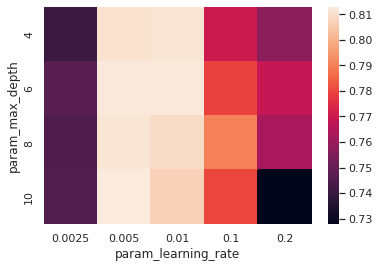

In [38]:
results = pd.DataFrame(gbr.cv_results_)

pvt = pd.pivot_table(pd.DataFrame(results),
    values='mean_test_score', index='param_max_depth', columns='param_learning_rate')

ax = sns.heatmap(pvt)

In [39]:
params = {
    "n_estimators": [500],
    "subsample": [0.4],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.004, 0.005, 0.00625, 0.0075],
}

gbr = GridSearchCV(estimator=GradientBoostingRegressor(),
                   param_grid=params, n_jobs=-1, cv=5) 

gbr.fit(features_train, target_train)

print(gbr.best_params_)
print("Best average CV score: {:.4f}".format(gbr.best_score_))
print("Score on test set: {:.4f}".format(gbr.score(features_test, target_test)))

{'learning_rate': 0.0075, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.4}
Best average CV score: 0.8155
Score on test set: 0.7963


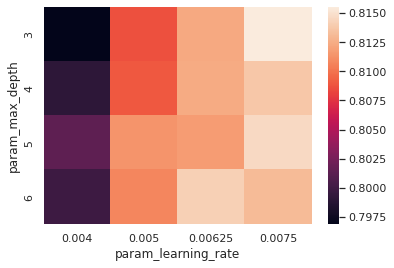

In [40]:
results = pd.DataFrame(gbr.cv_results_)

pvt = pd.pivot_table(pd.DataFrame(results),
    values='mean_test_score', index='param_max_depth', columns='param_learning_rate')

ax = sns.heatmap(pvt)